In [7]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [8]:
#Load data
marketing_train = pd.read_csv("marketingtr.csv")

In [9]:
#Exploratory Data Analysis
marketing_train['schooling'] = marketing_train['schooling'].replace("illiterate", "unknown")
marketing_train['schooling'] = marketing_train['schooling'].replace(["basic.4y","basic.6y","basic.9y","high.school","professional.course"], "high.school")
marketing_train['default'] = marketing_train['default'].replace("yes", "unknown")
marketing_train['marital'] = marketing_train['marital'].replace("unknown", "married")
marketing_train['month'] = marketing_train['month'].replace(["sep","oct","mar","dec"], "dec")
marketing_train['month'] = marketing_train['month'].replace(["aug","jul","jun","may","nov"], "jun")
marketing_train['loan'] = marketing_train['loan'].replace("unknown", "no")
marketing_train['profession'] = marketing_train['profession'].replace(["management","unknown","unemployed","admin."], "admin.")
marketing_train['profession'] = marketing_train['profession'].replace(["blue-collar","housemaid","services","self-employed","entrepreneur","technician"], "blue-collar")

## Missing Value Analysis


In [11]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(marketing_train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(marketing_train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

In [12]:
#imputation method
#Actual value = 29
#Mean = 40.01
#Median = 38
#KNN = 29.35

#create missing value
#marketing_train['custAge'].loc[70] = np.nan

In [13]:
#Impute with mean
#marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].mean())

#Impute with median
#marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].median())

In [14]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, marketing_train.shape[1]):
    #print(i)
    if(marketing_train.iloc[:,i].dtypes == 'object'):
        marketing_train.iloc[:,i] = pd.Categorical(marketing_train.iloc[:,i])
        #print(marketing_train[[i]])
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].cat.codes 
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].astype('object')
        
        lis.append(marketing_train.columns[i])
        

In [15]:
#replace -1 with NA to impute
for i in range(0, marketing_train.shape[1]):
    marketing_train.iloc[:,i] = marketing_train.iloc[:,i].replace(-1, np.nan) 

In [17]:
#Apply KNN imputation algorithm
marketing_train = pd.DataFrame(KNN(k = 3).fit_transform(marketing_train), columns = marketing_train.columns)

Imputing row 1/7414 with 0 missing, elapsed time: 10.787
Imputing row 101/7414 with 1 missing, elapsed time: 10.792
Imputing row 201/7414 with 0 missing, elapsed time: 10.795
Imputing row 301/7414 with 1 missing, elapsed time: 10.799
Imputing row 401/7414 with 0 missing, elapsed time: 10.802
Imputing row 501/7414 with 0 missing, elapsed time: 10.806
Imputing row 601/7414 with 0 missing, elapsed time: 10.809
Imputing row 701/7414 with 1 missing, elapsed time: 10.813
Imputing row 801/7414 with 1 missing, elapsed time: 10.816
Imputing row 901/7414 with 1 missing, elapsed time: 10.819
Imputing row 1001/7414 with 0 missing, elapsed time: 10.823
Imputing row 1101/7414 with 1 missing, elapsed time: 10.827
Imputing row 1201/7414 with 1 missing, elapsed time: 10.831
Imputing row 1301/7414 with 1 missing, elapsed time: 10.835
Imputing row 1401/7414 with 0 missing, elapsed time: 10.839
Imputing row 1501/7414 with 1 missing, elapsed time: 10.842
Imputing row 1601/7414 with 1 missing, elapsed time:

In [18]:
#Convert into proper datatypes
for i in lis:
    marketing_train.loc[:,i] = marketing_train.loc[:,i].round()
    marketing_train.loc[:,i] = marketing_train.loc[:,i].astype('object')

## Outlier Analysis

In [19]:
#df = marketing_train.copy()
#marketing_train = df.copy()

In [20]:
# #Plot boxplot to visualize Outliers
# %matplotlib inline  
# plt.boxplot(marketing_train['custAge'])

In [21]:
#save numeric names
cnames =  ["custAge", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m",
           "nr.employed", "pmonths", "pastEmail"]

In [22]:
# #Detect and delete outliers from data
# for i in cnames:
#     print(i)
#     q75, q25 = np.percentile(marketing_train.loc[:,i], [75 ,25])
#     iqr = q75 - q25

#     min = q25 - (iqr*1.5)
#     max = q75 + (iqr*1.5)
#     print(min)
#     print(max)
    
#     marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i] < min].index)
#     marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i] > max].index)

In [23]:
#Detect and replace with NA
# #Extract quartiles
# q75, q25 = np.percentile(marketing_train['custAge'], [75 ,25])

# #Calculate IQR
# iqr = q75 - q25

# #Calculate inner and outer fence
# minimum = q25 - (iqr*1.5)
# maximum = q75 + (iqr*1.5)

# #Replace with NA
# marketing_train.loc[marketing_train['custAge'] < minimum,:'custAge'] = np.nan
# marketing_train.loc[marketing_train['custAge'] > maximum,:'custAge'] = np.nan

# #Calculate missing value
# missing_val = pd.DataFrame(marketing_train.isnull().sum())

# #Impute with KNN
# marketing_train = pd.DataFrame(KNN(k = 3).complete(marketing_train), columns = marketing_train.columns)

## Feature Selection

In [24]:
##Correlation analysis
#Correlation plot
df_corr = marketing_train.loc[:,cnames]

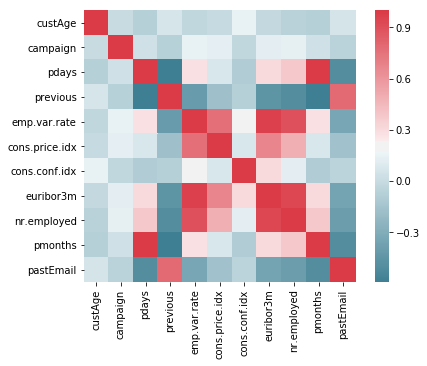

In [25]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [26]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["profession", "marital", "schooling", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

In [27]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(marketing_train['responded'], marketing_train[i]))
    print(p)

profession
1.6242589537712605e-34
marital
4.693435664866768e-05
schooling
4.071800591948163e-08
default
1.626010224096433e-15
housing
0.5469213692385477
loan
0.09547438986454948
contact
4.416434113838791e-36
month
3.3492292613263237e-139
day_of_week
0.038266146752773816
poutcome
3.898575747043989e-181


In [28]:
marketing_train = marketing_train.drop(['pdays', 'emp.var.rate', 'day_of_week', 'loan', 'housing'], axis=1)

## Feature Scaling

In [29]:
#df = marketing_train.copy()
#marketing_train = df.copy()

(array([3.193e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.953e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.560e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.770e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.450e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+0

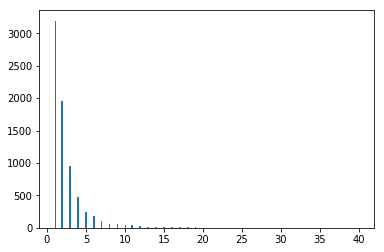

In [30]:
#Normality check
%matplotlib inline  
plt.hist(marketing_train['campaign'], bins='auto')

In [31]:
cnames = ["custAge","campaign","previous","cons.price.idx","cons.conf.idx","euribor3m","nr.employed",
           "pmonths","pastEmail"]

In [32]:
#Nomalisation
for i in cnames:
    print(i)
    marketing_train[i] = (marketing_train[i] - min(marketing_train[i]))/(max(marketing_train[i]) - min(marketing_train[i]))

custAge
campaign
previous
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
pmonths
pastEmail


In [33]:
# #Standarisation
# for i in cnames:
#     print(i)
#     marketing_train[i] = (marketing_train[i] - marketing_train[i].mean())/marketing_train[i].std()

## Model Development

In [38]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [39]:
#replace target categories with Yes or No
marketing_train['responded'] = marketing_train['responded'].replace(0, 'No')
marketing_train['responded'] = marketing_train['responded'].replace(1, 'Yes')

In [40]:
#Divide data into train and test
X = marketing_train.values[:, 0:16]
Y = marketing_train.values[:,16]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [41]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)

#Create dot file to visualise tree  #http://webgraphviz.com/
# dotfile = open("pt.dot", 'w')
# df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = marketing_train.columns)

In [42]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Results
#Accuracy: 84.49
#FNR: 63

83.68172623061362

In [43]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [44]:
RF_Predictions = RF_model.predict(X_test)

In [45]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy: 88
#FNR: 67

89.00876601483479

In [46]:
#Let us prepare data for logistic regression
#replace target categories with Yes or No
marketing_train['responded'] = marketing_train['responded'].replace('No', 0)
marketing_train['responded'] = marketing_train['responded'].replace('Yes', 1)

In [47]:
#Create logistic data. Save target variable first
marketing_train_logit = pd.DataFrame(marketing_train['responded'])

In [48]:
#Add continous variables
marketing_train_logit = marketing_train_logit.join(marketing_train[cnames])

In [49]:
marketing_train_logit.head()

,responded,custAge,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,0,0.486842,0.000000,0.000000,0.389322,0.368201,0.806393,0.877883,1.0,0.000000
1,0,0.320175,0.000000,0.000000,0.669135,0.338912,0.980730,1.000000,1.0,0.000000
2,0,0.315789,0.000000,0.000000,0.698753,0.602510,0.957379,0.859735,1.0,0.000000
3,0,0.486842,0.025641,0.000000,0.669135,0.338912,0.981183,1.000000,1.0,0.000000
4,0,0.257879,0.102564,0.166667,0.269680,0.192469,0.148946,0.512287,1.0,0.055556


In [50]:
##Create dummies for categorical variables
cat_names = ["profession", "marital", "schooling", "default", "contact", "month", "poutcome"]

for i in cat_names:
    temp = pd.get_dummies(marketing_train[i], prefix = i)
    marketing_train_logit = marketing_train_logit.join(temp)

In [51]:
Sample_Index = np.random.rand(len(marketing_train_logit)) < 0.8

train = marketing_train_logit[Sample_Index]
test = marketing_train_logit[~Sample_Index]

In [52]:
#select column indexes for independent variables
train_cols = train.columns[1:30]

In [53]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train['responded'], train[train_cols]).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.278533
         Iterations 8


/home/quantiphi/py3_kernel/lib/python3.5/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/quantiphi/py3_kernel/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/quantiphi/py3_kernel/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/quantiphi/py3_kernel/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              responded   No. Observations:                 5918
Model:                          Logit   Df Residuals:                     5895
Method:                           MLE   Df Model:                           22
Date:                Tue, 14 May 2019   Pseudo R-squ.:                  0.2098
Time:                        10:50:54   Log-Likelihood:                -1648.4
converged:                       True   LL-Null:                       -2086.0
                                        LLR p-value:                6.184e-171
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
custAge            0.0110      0.413      0.027      0.979      -0.798       0.820
campaign          -1.5992      0.966     -1.655      0.098      -3.493       0.295
previous           0.1392      1.101      0.126      0.899      -2.019       2.298
cons.price.idx     2.0105      0.571      3.522      0.000       0.892       3.130
cons.conf.idx      1.6010      0.351      4.559      0.000       0.913       2.289
euribor3m         -3.1127      0.936     -3.325      0.001      -4.947      -1.278
nr.employed        0.9903      1.095      0.904      0.366      -1.157       3.137
pmonths           -1.0909      0.529     -2.060      0.039      -2.129      -0.053
pastEmail         -0.2814      0.791     -0.356      0.722      -1.832       1.270
profession_0.0     0.0037   1.27e+06   2.89e-09      1.000   -2.49e+06    2.49e+06
profession_1.0    -0.1397        nan        nan        nan         nan         nan
profession_2.0     0.1733        nan        nan        nan         nan         nan
profession_3.0     0.5857        nan        nan        nan         nan         nan
marital_0.0       -2.6088   3.02e+06  -8.63e-07      1.000   -5.92e+06    5.92e+06
marital_1.0       -2.7453   3.33e+06  -8.25e-07      1.000   -6.52e+06    6.52e+06
marital_2.0       -2.6501   3.29e+06  -8.07e-07      1.000   -6.44e+06    6.44e+06
schooling_0.0      2.2340        nan        nan        nan         nan         nan
schooling_1.0      2.4020        nan        nan        nan         nan         nan
schooling_2.0      2.5420        nan        nan        nan         nan         nan
default_0.0       -0.4915   3.15e+06  -1.56e-07      1.000   -6.16e+06    6.16e+06
default_1.0       -0.7986   3.17e+06  -2.52e-07      1.000   -6.21e+06    6.21e+06
contact_0.0        0.0682    3.1e+06    2.2e-08      1.000   -6.08e+06    6.08e+06
contact_1.0       -0.6080    3.1e+06  -1.96e-07      1.000   -6.08e+06    6.08e+06
month_0.0         -0.1004        nan        nan        nan         nan         nan
month_1.0          0.1338        nan        nan        nan         nan         nan
month_2.0         -0.5732        nan        nan        nan         nan         nan
poutcome_0.0      -0.7900   3.99e+06  -1.98e-07      1.000   -7.82e+06    7.82e+06
poutcome_1.0      -0.0328   3.99e+06  -8.22e-09      1.000   -7.82e+06    7.82e+06
poutcome_2.0       0.2830   3.99e+06    7.1e-08      1.000   -7.82e+06    7.82e+06
==================================================================================
"""

In [54]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

/home/quantiphi/py3_kernel/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/quantiphi/py3_kernel/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/quantiphi/py3_kernel/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [55]:
#Build confusion matrix
CM = pd.crosstab(test['responded'], test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

(FN*100)/(FN+TP)

68.6046511627907

In [56]:
#Accuracy: 90
#FNR: 74

In [57]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)

In [58]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [59]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Accuracy: 89
#FNR: 76

73.00613496932516

In [60]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [61]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [62]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Accuracy: 81
#FNR: 40

49.079754601226995

## Cluster Analysis

In [63]:
#Load data
df = pd.read_csv("df.csv")

FileNotFoundError: File b'df.csv' does not exist

In [ ]:
#Load required libraries
from sklearn.cluster import KMeans

#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(df.iloc[:,0:4])
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [ ]:
#Plot line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
#Implement kmeans
kmeans_model = KMeans(n_clusters = 3).fit(df.iloc[:,0:4])

In [ ]:
#Summarize output
pd.crosstab(df['Species'], kmeans_model.labels_)

In [ ]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( df.iloc[:,0:4] )
    cluster_errors.append( clusters.inertia_ )

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [ ]:
%matplotlib inline  

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )